In [1]:
import imageio as io
import numpy as np
from skimage import morphology
from matplotlib import pyplot as plt

# pip install zipfile36

# Downloading the dataset:

# If using Linux, use this command:
# !mkdir data_faces && wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip

# Use the lines below if using Windows:
import urllib.request
url = 'https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip'
filename = 'celeba.zip'
urllib.request.urlretrieve(url, filename)

import zipfile
import os
import shutil
import pandas as pd


In [2]:
# Extract the images that were downloaded in the zip file:
with zipfile.ZipFile("celeba.zip", "r") as zip_ref:
    zip_ref.extractall("data_faces/")

In [3]:
root = 'data_faces/img_align_celeba'
img_list = os.listdir(root)
print("There are", len(img_list), "images on this database.")

There are 202600 images on this database.


In [4]:
# Loads the downloaded csv mentioned in Kaggle link on input images section.
df = pd.read_csv("list_attr_celeba.csv")
df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [5]:
# Creates a data frame with the following attribute, in case it is needed
# people_smiling = df[['image_id', 'Smiling']]
# people_smiling

In [7]:
# Before running this cell, remember to create the folders or check if they already exist.
# This cell will insert 1000 photos of people smiling on smile folder and 1000 photos of people not smiling on no_smile folder
# Just change attribute Smiling for any of your choice.
os.mkdir('data')
os.mkdir('data/smile')
os.mkdir('data/no_smile')
maxNum = 999
smileFlag, noSmileFlag = 0, 0

for i, (_, i_row) in enumerate(df.iterrows()):
    if smileFlag < maxNum:
        if i_row['Smiling'] == 1:
            smileFlag += 1
            shutil.copyfile('data_faces/img_align_celeba/' + i_row['image_id'], 'data/smile/' + i_row['image_id'])
    if noSmileFlag < maxNum:
        if i_row['Smiling'] == -1:
            noSmileFlag += 1
            shutil.copyfile('data_faces/img_align_celeba/' + i_row['image_id'], 'data/no_smile/' + i_row['image_id'])

In [8]:
img_list_smile = os.listdir('data/smile')
img_list_no_smile = os.listdir('data/no_smile')
# img_list[0] = 000001.jpg

Text(0.5, 1.0, 'Initial image')

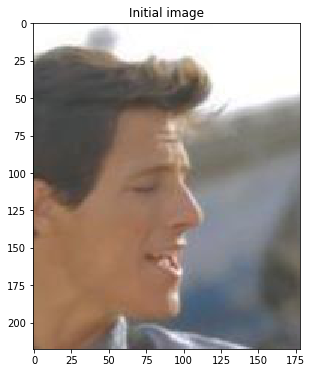

In [43]:
# input_filename = "img_align_celeba/000005.jpg"
input_filename = "data_faces/img_align_celeba/" + img_list[2]
# input_filename_no_smile = "data/no_smile/" + img_list[2]
output_filename = ""
input_image = io.imread(input_filename)

plt.subplots(figsize=(16,6))
plt.imshow(input_image); plt.title('Initial image')

In [44]:
# Lower and upper boundaries for pixel intensities to be considered skin
lower = np.array([0, 48, 80], dtype=np.uint8)
upper = np.array([20, 255, 255], dtype=np.uint8)

In [45]:
# RGB to HSV
def rgb_pixel2hsv(rgb_pixel: np.ndarray):
    r,g,b = rgb_pixel/255.0
    hsv_pixel = np.zeros((3,), dtype=np.float64)
    
    cmax = float(max(r, g, b))
    cmin = float(min(r, g, b))
    diff = cmax - cmin
    
    if (cmax == cmin):
        hsv_pixel[0] = 0
    elif (cmax == r):
        hsv_pixel[0] = ((60 * ((g - b) / diff) + 360) % 360)/360.0 * 255
    elif (cmax == g):
        hsv_pixel[0] = ((60 * ((b - r) / diff) + 120) % 360)/360.0 * 255
    elif (cmax == b):
        hsv_pixel[0] = ((60 * ((r - g) / diff) + 240) % 360)/360.0 * 255    
    
    if (cmax == 0):
        hsv_pixel[1] = 0
    else:
        hsv_pixel[1] = (diff / cmax) * 255
        
    hsv_pixel[2] = cmax * 255
        
    return hsv_pixel

def rgb2hsv(input_image: np.ndarray):
    n, m, _ = input_image.shape
    
    output_image = np.array([rgb_pixel2hsv(input_image[i][j]) for i in range(n) for j in range(m)],
                           dtype=np.float64).reshape(n,m,3)
    return output_image
    

Text(0.5, 1.0, 'Iniitial image in HSV')

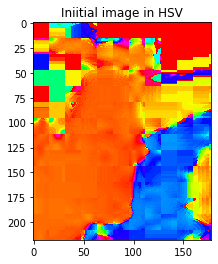

In [46]:
hsv_image = rgb2hsv(input_image)

plt.imshow(hsv_image[:, :,0], cmap="hsv")
plt.title("Iniitial image in HSV")

In [47]:
def skin_mask(hsv_image: np.ndarray):
    n,m, _ = input_image.shape
    auxiliar = np.clip(np.multiply(np.where(hsv_image > lower,255, 0),np.where(hsv_image < upper,255,0)), 0,1)
    output = np.array([auxiliar[i][j][0]*auxiliar[i][j][1]*auxiliar[i][j][2] for i in range(n) for j in range(m)],
                      dtype=np.uint8).reshape(n,m)
    return output

Text(0.5, 1.0, 'Initial Mask')

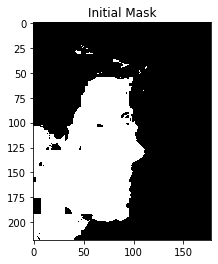

In [48]:
mask_image = skin_mask(hsv_image)
plt.imshow(mask_image, cmap="gray")
plt.title('Initial Mask')

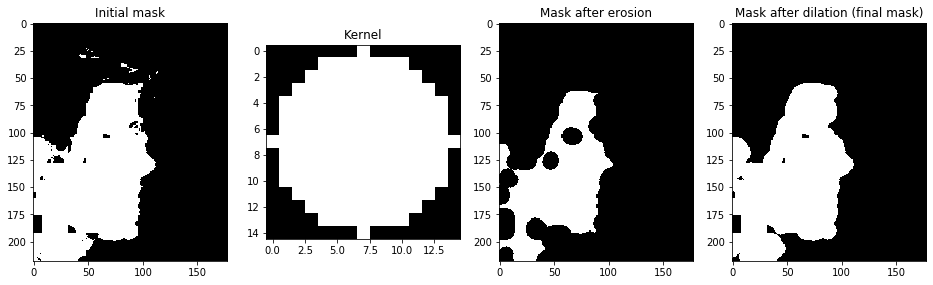

In [49]:
def opening(mask_image):
    # Apply a erosion and dilation to the mask using an elliptical kernel

    fig = plt.figure(figsize=(16, 6))
    plt.subplot(1, 4, 1); plt.imshow(mask_image, cmap="gray"); plt.title("Initial mask")

    # Kernel used by PyImageSearch
    # kernel = np.array([
    #     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    #     [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    #     [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    #     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    #     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    #     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    #     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    #     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    #     [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    #     [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    #     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    # ])

    # Kernel used by Moacir
    kernel = morphology.disk(7)
    plt.subplot(1, 4, 2); plt.imshow(kernel, cmap="gray"); plt.title("Kernel")

    # This operation could also be done with binary_opening
    mask_image_opening = morphology.binary_erosion(mask_image, kernel).astype(np.uint8)
    plt.subplot(1, 4, 3); plt.imshow(mask_image_opening, cmap="gray"); plt.title("Mask after erosion")
    mask_image_opening = morphology.binary_dilation(mask_image_opening, kernel).astype(np.uint8)
    plt.subplot(1, 4, 4); plt.imshow(mask_image_opening, cmap="gray"); plt.title("Mask after dilation (final mask)")
    
    return mask_image_opening

mask_image_opening = opening(mask_image)

In [50]:
def filter_median(src: np.ndarray, filter_size: int) -> np.ndarray:
    '''
    Returns the filtered src using the median filter with filter_size
    '''
    dst: np.ndarray = np.zeros(src.shape, dtype=np.uint8)
    src = np.pad(src, filter_size//2, mode="constant", constant_values=0)
    n,m = src.shape
    a:int = filter_size // 2

    for i in range(a, n - a):
        for j in range(a, m - a):
            sub_src = sorted(src[i - a : i + 1 + a, j - a : j + 1 + a].flatten())
            dst[i - a][j - a] = sub_src[(filter_size*filter_size)//2]
    
    return dst

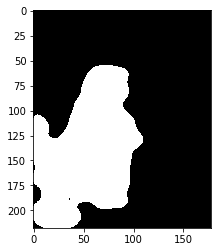

In [51]:
filtered_mask_image = filter_median(mask_image_opening, 9)
plt.imshow(filtered_mask_image, cmap="gray")

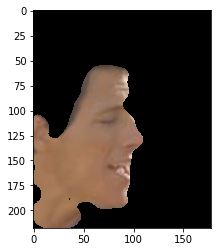

In [52]:
output_image = np.zeros(input_image.shape, dtype=np.uint8)
output_image[:, :, 0] = np.multiply(filtered_mask_image, input_image[:, :,0])
output_image[:, :, 1] = np.multiply(filtered_mask_image, input_image[:, :,1])
output_image[:, :, 2] = np.multiply(filtered_mask_image, input_image[:, :,2])
plt.imshow(output_image)